In [1]:
!pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf

In [3]:
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            
        # Verify memory growth is set
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2

In [8]:
import imghdr

In [9]:
data_dir = 'data'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
from matplotlib import pyplot as plt

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 515 files belonging to 3 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

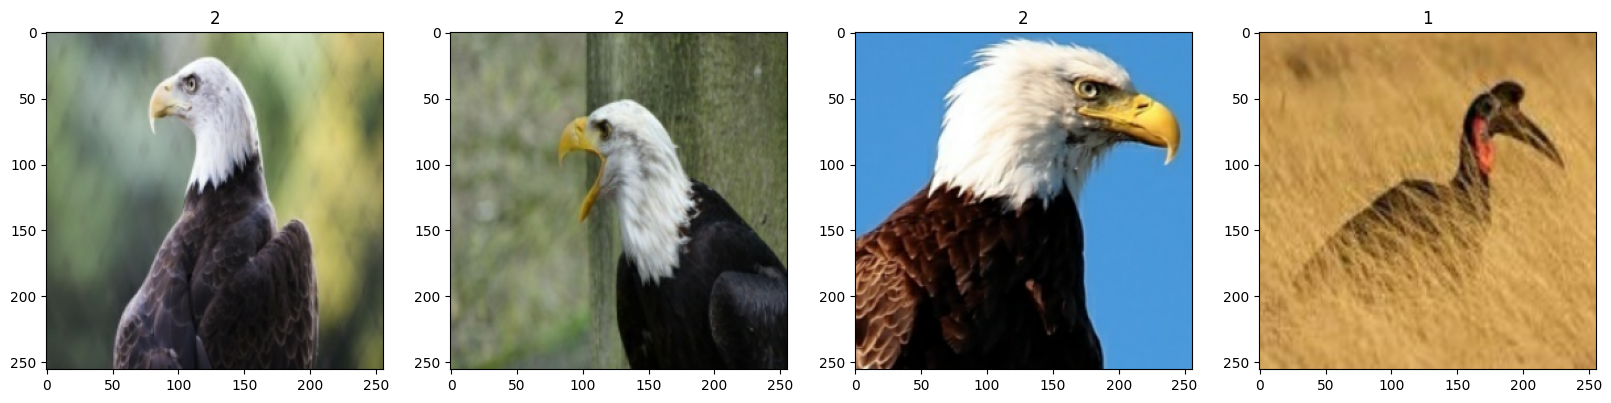

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [19]:
data.as_numpy_iterator().next()

(array([[[[0.79607844, 0.80784315, 0.84313726],
          [0.79607844, 0.80784315, 0.84313726],
          [0.79607844, 0.80784315, 0.84313726],
          ...,
          [0.79607844, 0.80784315, 0.84313726],
          [0.79607844, 0.80784315, 0.84313726],
          [0.79607844, 0.80784315, 0.84313726]],
 
         [[0.79607844, 0.80784315, 0.84313726],
          [0.79607844, 0.80784315, 0.84313726],
          [0.79607844, 0.80784315, 0.84313726],
          ...,
          [0.79289216, 0.80465686, 0.839951  ],
          [0.79289216, 0.80465686, 0.839951  ],
          [0.79289216, 0.80465686, 0.839951  ]],
 
         [[0.7987745 , 0.8105392 , 0.84583336],
          [0.7987745 , 0.8105392 , 0.84583336],
          [0.7987745 , 0.8105392 , 0.84583336],
          ...,
          [0.7948529 , 0.8066176 , 0.8419118 ],
          [0.7948529 , 0.8066176 , 0.8419118 ],
          [0.7948529 , 0.8066176 , 0.8419118 ]],
 
         ...,
 
         [[0.7529412 , 0.7921569 , 0.8392157 ],
          [0.75294

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

11

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [28]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/11
11/11 [==============================] - 10s 739ms/step - loss: 1.8770 - accuracy: 0.3750 - val_loss: 1.0129 - val_accuracy: 0.4062
Epoch 2/11
11/11 [==============================] - 8s 714ms/step - loss: 0.8685 - accuracy: 0.6108 - val_loss: 0.7672 - val_accuracy: 0.7083
Epoch 3/11
11/11 [==============================] - 8s 668ms/step - loss: 0.5415 - accuracy: 0.8068 - val_loss: 0.5136 - val_accuracy: 0.8438
Epoch 4/11
11/11 [==============================] - 8s 665ms/step - loss: 0.3545 - accuracy: 0.8835 - val_loss: 0.3496 - val_accuracy: 0.8542
Epoch 5/11
11/11 [==============================] - 8s 663ms/step - loss: 0.3512 - accuracy: 0.8580 - val_loss: 0.2651 - val_accuracy: 0.9375
Epoch 6/11
11/11 [==============================] - 8s 668ms/step - loss: 0.2432 - accuracy: 0.9261 - val_loss: 0.3275 - val_accuracy: 0.8854
Epoch 7/11
11/11 [==============================] - 8s 670ms/step - loss: 0.1874 - accuracy: 0.9403 - val_loss: 0.2367 - val_accuracy: 0.9271
Epoch

In [46]:
accuracy = model.evaluate(test)
print("Test Accuracy:", accuracy[1])


1/1 [==============================] - 1s 669ms/step - loss: 0.0199 - accuracy: 1.0000
Test Accuracy: 1.0


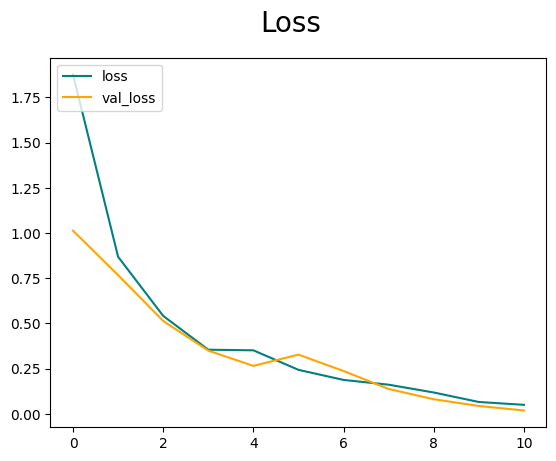

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

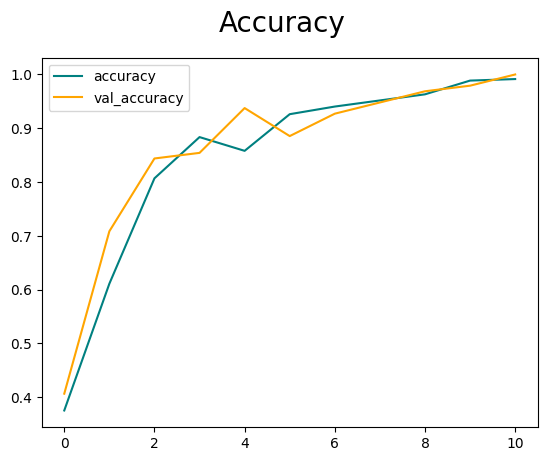

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [36]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [37]:
from tensorflow.keras.metrics import CategoricalAccuracy

# create metric objects
categorical_accuracy = CategoricalAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    categorical_accuracy.update_state(y, yhat)

print(f'Test Categorical Accuracy: {categorical_accuracy.result().numpy()}')


1/1 [==============================] - 0s 424ms/step
Test Categorical Accuracy: 0.0


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

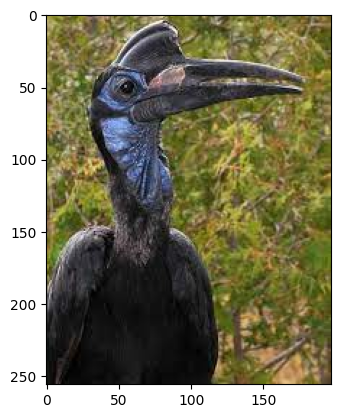

In [43]:
img = cv2.imread('4.jpeg')
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = np.asarray(img)
    plt.imshow(img_array)
    plt.show()
else:
    print('Could not read image')

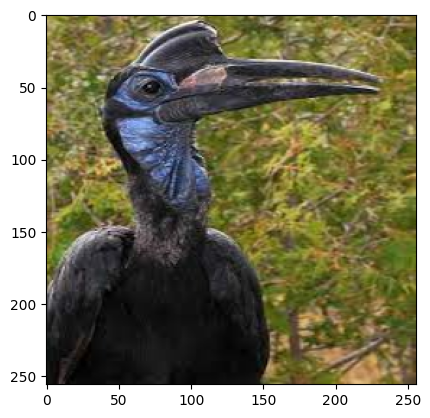

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
class_names = ["ABBOTTS BABBLER", "ABYSSINIAN GROUND HORNBILL", "BALD EAGLE"]
yhat = model.predict(np.expand_dims(resize / 255, 0))

# get predicted class index
class_idx = tf.argmax(yhat, axis=1)[0]

predicted_class = class_names[class_idx]
print(f"Predicted class is {predicted_class}")


1/1 [==============================] - 0s 70ms/step
Predicted class is ABYSSINIAN GROUND HORNBILL
